# VaR : Value at Risk

### The financial market offers numerous opportunities for gains. However, failing to manage the risk of loss can lead to many undesirable outcomes. To mitigate investment risks, a series of tools and techniques have been developed. Among them, one of the most established and widely used is Value at Risk (VaR). This risk assessment methodology, introduced by JP Morgan in 1994, estimates the maximum expected loss a portfolio can incur, assuming that future risk will resemble past behavior.

### The assumption that "the future will resemble the past" is a strong one and not always accurate. Nassim Taleb, renowned for his works The Black Swan and Antifragile, is one of the most vocal critics of VaR. According to him, the measure is flawed because it assumes that the normal distribution represents market behavior, overlooking “out-of-the-norm events” or, as Taleb calls them, Black Swans—events that are completely unpredictable and outside the expected range. One could argue that the COVID-19 pandemic was a Black Swan event.

### Despite this criticism, VaR remains widely used in financial markets.
### We will now proceed with an analysis using VaR, considering a portfolio consisting of 10 selected stocks from the Toronto Stock Exchange (TSX). This analysis will help demonstrate how VaR can be applied to assess the risk profile of a diversified portfolio, even while acknowledging the potential limitations highlighted by critics.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")



In [136]:
import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['RY.TO', 'TD.TO', 'ENB.TO', 'CNR.TO', 'SU.TO', 
           'ABX.TO', 'FTS.TO', 'SHOP.TO', 'BCE.TO', 'MG.TO']


data = {}

# Download the closing price data for each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    df = stock.history(start="2018-01-01", end="2023-12-31")
    data[ticker] = df['Close']  # Only the closing price column

# Convert the dictionary into a DataFrame
stock_data = pd.DataFrame(data)


In [137]:
stock_data.head()

,RY.TO,TD.TO,ENB.TO,CNR.TO,SU.TO,ABX.TO,FTS.TO,SHOP.TO,BCE.TO,MG.TO
Date,,,,,,,,,,
2018-01-02 00:00:00-05:00,78.759842,55.373371,32.048473,92.066177,35.609074,16.685102,35.161690,13.206,40.539932,55.561291
2018-01-03 00:00:00-05:00,79.478966,55.718945,32.316341,92.454964,35.936035,16.509562,34.868229,13.515,40.377201,55.685619
2018-01-04 00:00:00-05:00,80.243988,56.184696,32.514057,93.055832,36.224972,16.492012,34.744659,13.746,40.336521,56.423832
2018-01-05 00:00:00-05:00,80.129219,56.267326,32.258945,93.144218,35.685104,16.281364,34.760105,13.726,40.011055,57.410736
2018-01-08 00:00:00-05:00,79.800262,56.139614,32.258945,92.569855,35.624275,16.053162,34.736938,13.951,39.889027,57.076595


In [138]:
stock_data.isnull().sum()

RY.TO      0
TD.TO      0
ENB.TO     0
CNR.TO     0
SU.TO      0
ABX.TO     0
FTS.TO     0
SHOP.TO    0
BCE.TO     0
MG.TO      0
dtype: int64

In [139]:
stock_data.shape

(1505, 10)

In [140]:
# Define the time periods for the volatility calculation
pre_pandemic_period = stock_data.loc[:'2020-01-31']
pandemic_period = stock_data.loc['2020-02-01':'2021-12-31']
post_pandemic_period = stock_data.loc['2022-01-01':]

# Calculate daily returns for volatility calculation
returns_pre_pandemic = pre_pandemic_period.pct_change().dropna()
returns_pandemic = pandemic_period.pct_change().dropna()
returns_post_pandemic = post_pandemic_period.pct_change().dropna()

# Calculate volatility (standard deviation of returns) for each period
volatility_pre_pandemic = returns_pre_pandemic.std() * (252 ** 0.5)  # Annualized volatility
volatility_pandemic = returns_pandemic.std() * (252 ** 0.5)  # Annualized volatility
volatility_post_pandemic = returns_post_pandemic.std() * (252 ** 0.5)  # Annualized volatility

# Combine the results into a DataFrame for display
volatility_df = pd.DataFrame({
    'Pre-pandemic': volatility_pre_pandemic,
    'Pandemic': volatility_pandemic,
    'Post-pandemic': volatility_post_pandemic
})

print(volatility_df)

         Pre-pandemic  Pandemic  Post-pandemic
RY.TO        0.107964  0.281298       0.158189
TD.TO        0.111851  0.316627       0.180262
ENB.TO       0.209829  0.355240       0.171924
CNR.TO       0.179874  0.284067       0.193650
SU.TO        0.230848  0.581638       0.338209
ABX.TO       0.312442  0.403105       0.321534
FTS.TO       0.115095  0.266179       0.163106
SHOP.TO      0.480617  0.580988       0.746234
BCE.TO       0.110377  0.255631       0.147793
MG.TO        0.270288  0.429542       0.360249


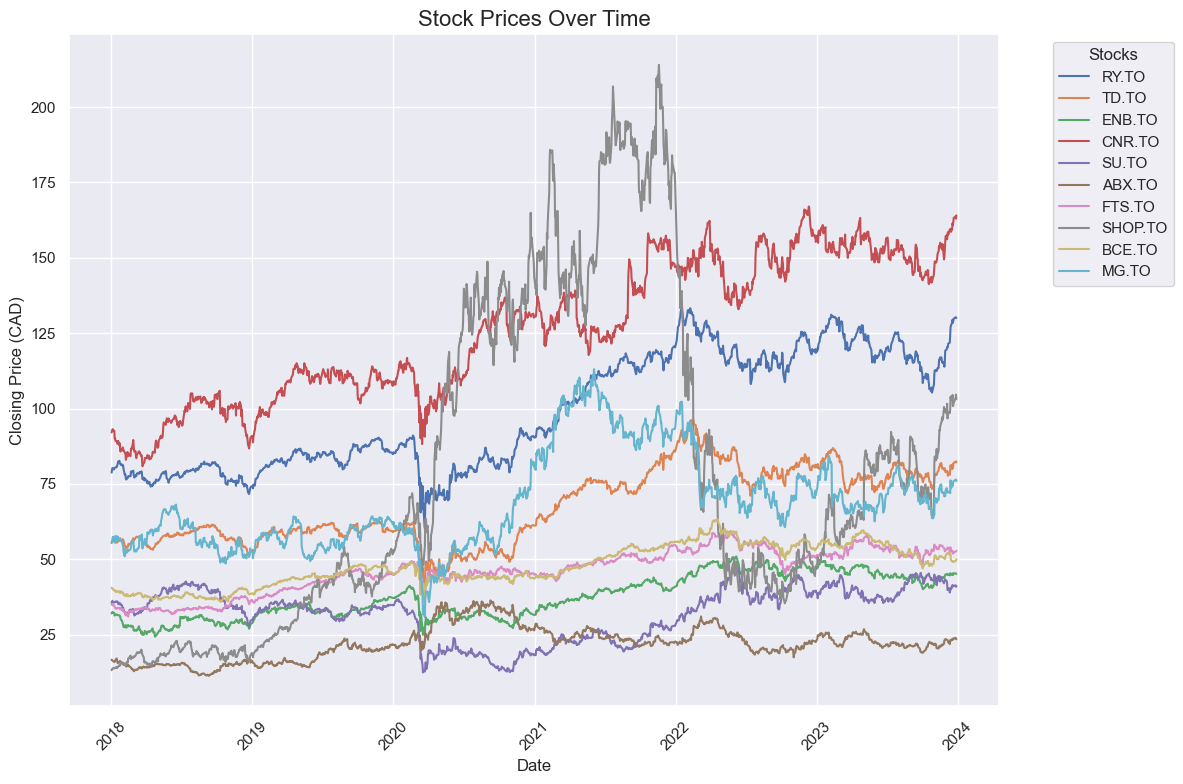

In [141]:
# Reset the index so the dates become a column
stock_data = stock_data.reset_index()

# Melt the DataFrame to transform the tickers into a single column
df_melted = stock_data.melt(id_vars='Date', var_name='Ticker', value_name='Closing Price')

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Date', y='Closing Price', hue='Ticker')

# Plot configurations
plt.title('Stock Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (CAD)', fontsize=12)
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### As displayed in the graph, SHOP was the stock that rocketed in value during the pandemic. In addition, CNR, RY, MG, and TD all gained in value. Furthermore, in early 2022, following the epidemic, SHOP prices returned to pre-pandemic levels.

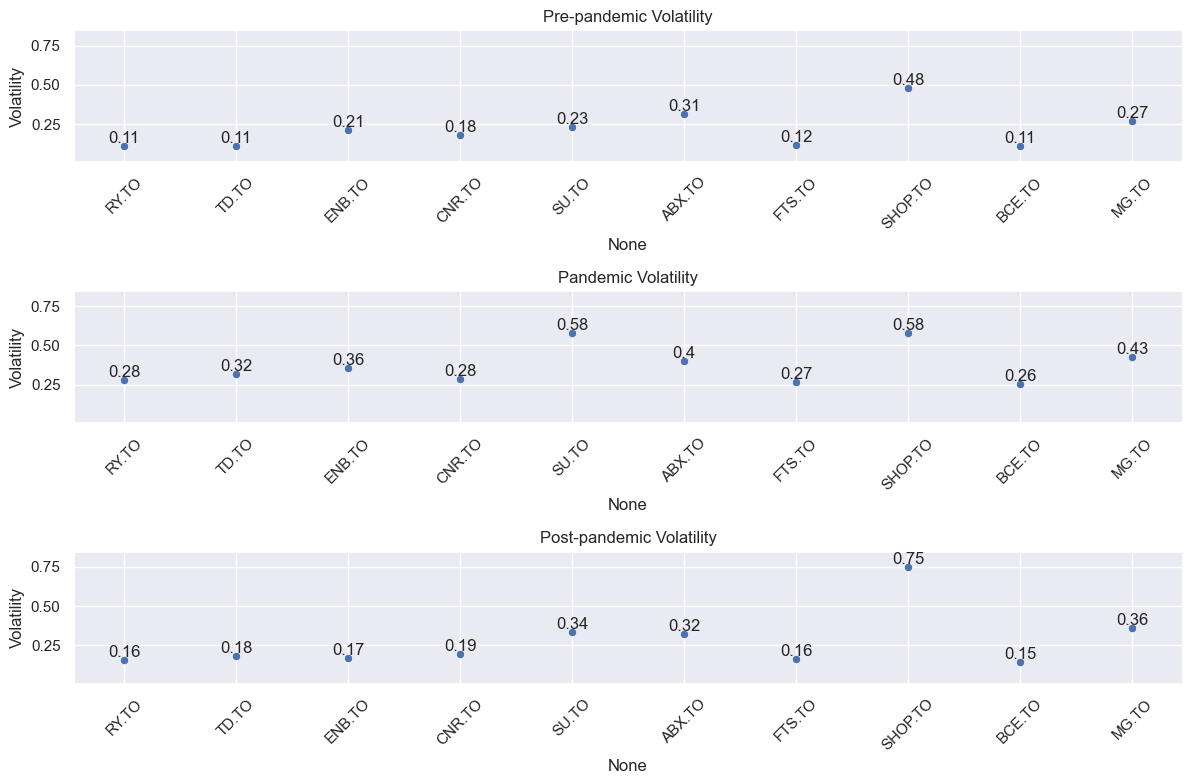

In [142]:
# y limits
y_min = min(volatility_df.min() - 0.1)
y_max = max(volatility_df.max() + 0.1)

# Create the figure and subplots
plt.figure(figsize=(12, 8))

# Scatter plot for the pre-pandemic period
plt.subplot(3, 1, 1)
sns.scatterplot(x=volatility_df.index, y=volatility_df['Pre-pandemic'])
plt.title('Pre-pandemic Volatility')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.ylim(y_min, y_max)

# Add values above the points
for i in range(len(volatility_df)):
    plt.text(i, volatility_df['Pre-pandemic'].iloc[i], 
             round(volatility_df['Pre-pandemic'].iloc[i], 2), 
             ha='center', va='bottom')

# Scatter plot for the pandemic period
plt.subplot(3, 1, 2)
sns.scatterplot(x=volatility_df.index, y=volatility_df['Pandemic'])
plt.title('Pandemic Volatility')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.ylim(y_min, y_max)

# Add values above the points
for i in range(len(volatility_df)):
    plt.text(i, volatility_df['Pandemic'].iloc[i], 
             round(volatility_df['Pandemic'].iloc[i], 2), 
             ha='center', va='bottom')

# Scatter plot for the post-pandemic period
plt.subplot(3, 1, 3)
sns.scatterplot(x=volatility_df.index, y=volatility_df['Post-pandemic'])
plt.title('Post-pandemic Volatility')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.ylim(y_min, y_max)

# Add values above the points
for i in range(len(volatility_df)):
    plt.text(i, volatility_df['Post-pandemic'].iloc[i], 
             round(volatility_df['Post-pandemic'].iloc[i], 2), 
             ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()
plt.show()


In [143]:
volatility_df

,Pre-pandemic,Pandemic,Post-pandemic
RY.TO,0.107964,0.281298,0.158189
TD.TO,0.111851,0.316627,0.180262
ENB.TO,0.209829,0.355240,0.171924
CNR.TO,0.179874,0.284067,0.193650
SU.TO,0.230848,0.581638,0.338209
ABX.TO,0.312442,0.403105,0.321534
FTS.TO,0.115095,0.266179,0.163106
SHOP.TO,0.480617,0.580988,0.746234
BCE.TO,0.110377,0.255631,0.147793
MG.TO,0.270288,0.429542,0.360249


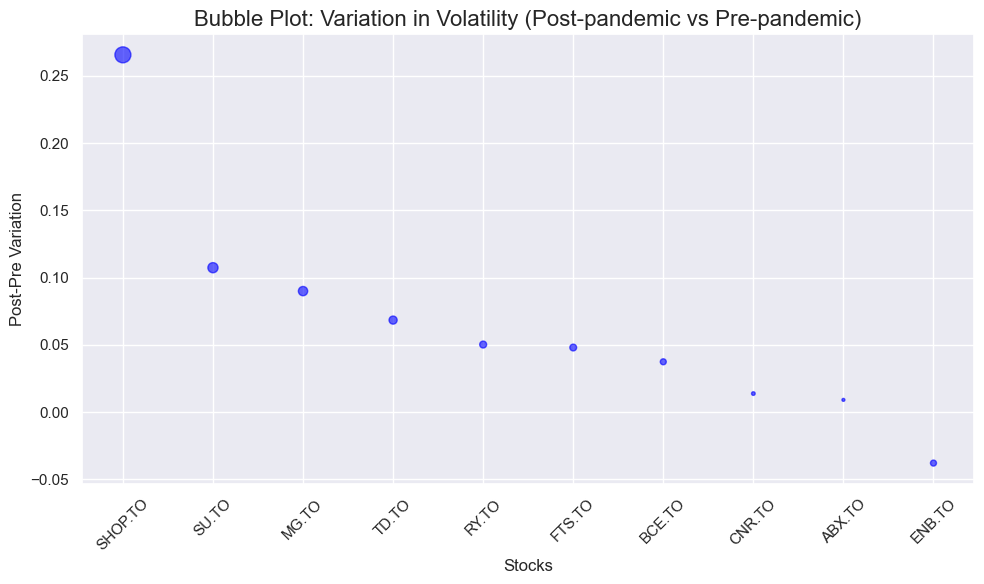

In [147]:
# Create the column 'Variation Post-Pre' as the subtraction between the two periods
volatility_df['Variation Post-Pre'] = volatility_df['Post-pandemic'] - volatility_df['Pre-pandemic']

# Sort the DataFrame from largest to smallest based on the variation
volatility_df_sorted = volatility_df.sort_values(by='Variation Post-Pre', ascending=False)

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Bubble size based on the variation (multiplier adjusts the bubble size)
bubble_sizes = abs(volatility_df_sorted['Variation Post-Pre']) * 500  # Adjust bubble size

# Plot the bubbles
plt.scatter(volatility_df_sorted.index, volatility_df_sorted['Variation Post-Pre'], s=bubble_sizes, color='blue', alpha=0.6)

# Add title and labels
plt.title('Bubble Plot: Variation in Volatility (Post-pandemic vs Pre-pandemic)', fontsize=16)
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Post-Pre Variation', fontsize=12)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
